Copyright 2021 Abbrivia GmbH https://www.abbrivia.com CC-BY (By Attribution) 4.0 https://creativecommons.org/licenses/by/4.0/legalcode
Reuse our work freely

All visualizations, and code produced in this notebook are completely open access under the Creative Commons BY license. You have the permission to use, distribute, and reproduce these in any medium, provided the source and authors are credited.

The data produced by third parties and made available by "Our World in Data" is subject to the license terms from the original third-party authors. Check the license of any third-party data before use and redistribution on 'https://ourworldindata.org/coronavirus' site (see below).

# This notebook shows a noteworthy relationship between Vaccinations and Excess Mortality in OWID Dataset 

The same clusters appear on the scatter plot of Excess Mortality vs Vaccinations and on the geographical map.

# Getting the Data

See the defintions and further discussion on the used dataset at the "Our World in Data" site  https://ourworldindata.org/covid-vaccinations

The data is taken specifically from https://covid.ourworldindata.org/data/owid-covid-data.xlsx file

Hannah Ritchie, Edouard Mathieu, Lucas Rodés-Guirao, Cameron Appel, Charlie Giattino, Esteban Ortiz-Ospina, Joe Hasell, Bobbie Macdonald, Diana Beltekian and Max Roser (2020) - "Coronavirus Pandemic (COVID-19)". Published online at OurWorldInData.org. Retrieved from: 'https://ourworldindata.org/coronavirus' [Online Resource]

We use Excel file because it contains the data format information in itself. If you want to run this more often consider manually downloading the data and sourcing it locally as shown in the next line (commented out).

In [36]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [5]:
d=pd.read_excel('https://covid.ourworldindata.org/data/owid-covid-data.xlsx')

Let's only leave the rows that have both Vaccinations and Excess Mortality data.

In [33]:
df=d[(~d['excess_mortality_cumulative_per_million'].isnull()) & (~d['total_vaccinations_per_hundred'].isnull())]

And now we take the latest values.

In [34]:
df_latest=df.loc[df.groupby(['iso_code'])['total_vaccinations_per_hundred'].idxmax()] 

We have noted that the countries can be split into two groups by the 'excess_mortality_cumulative_per_million' / 'total_vaccinations_per_hundred'] ratio (empirical value 25).

In [40]:
df_latest['excess_vax_cluster']=np.where(df_latest['excess_mortality_cumulative_per_million']/df_latest['total_vaccinations_per_hundred']>25,'1','0')

# The Chars

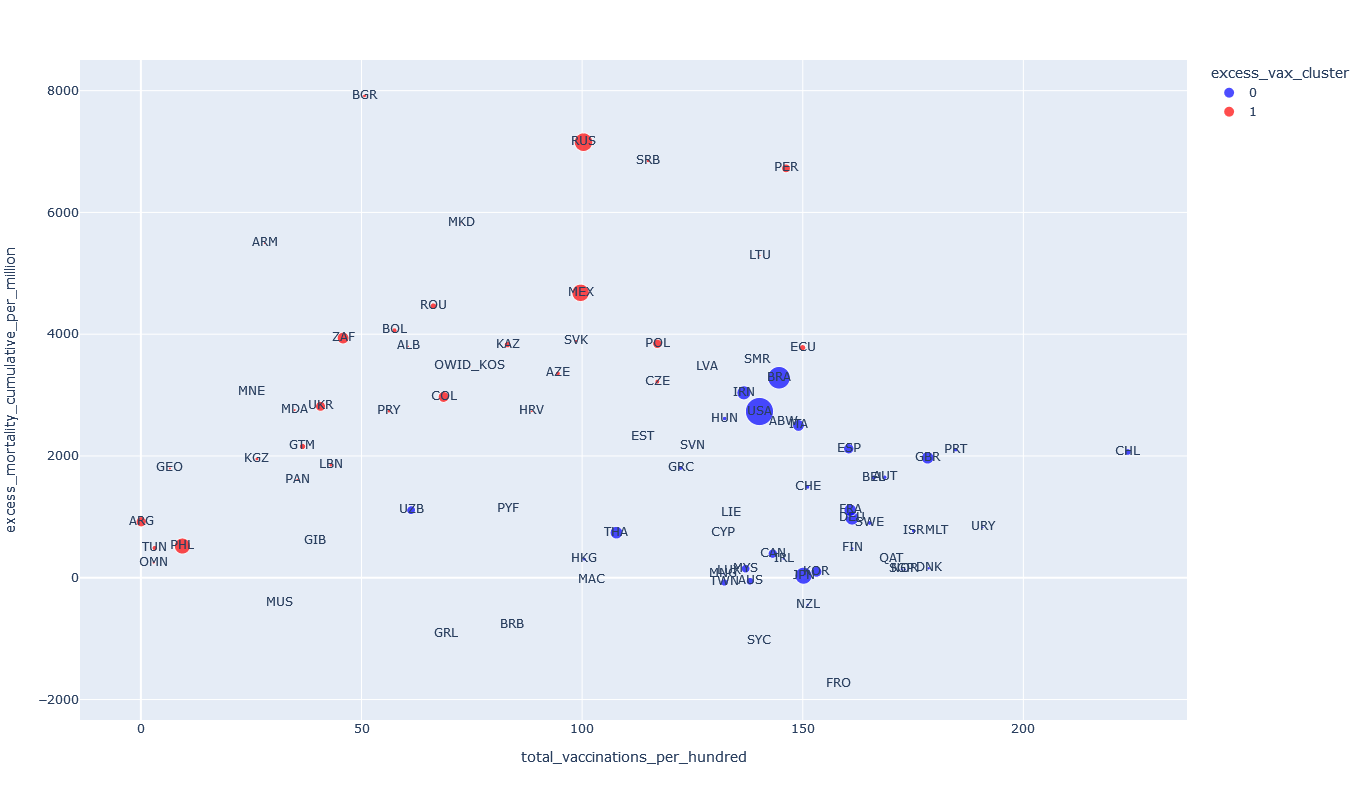

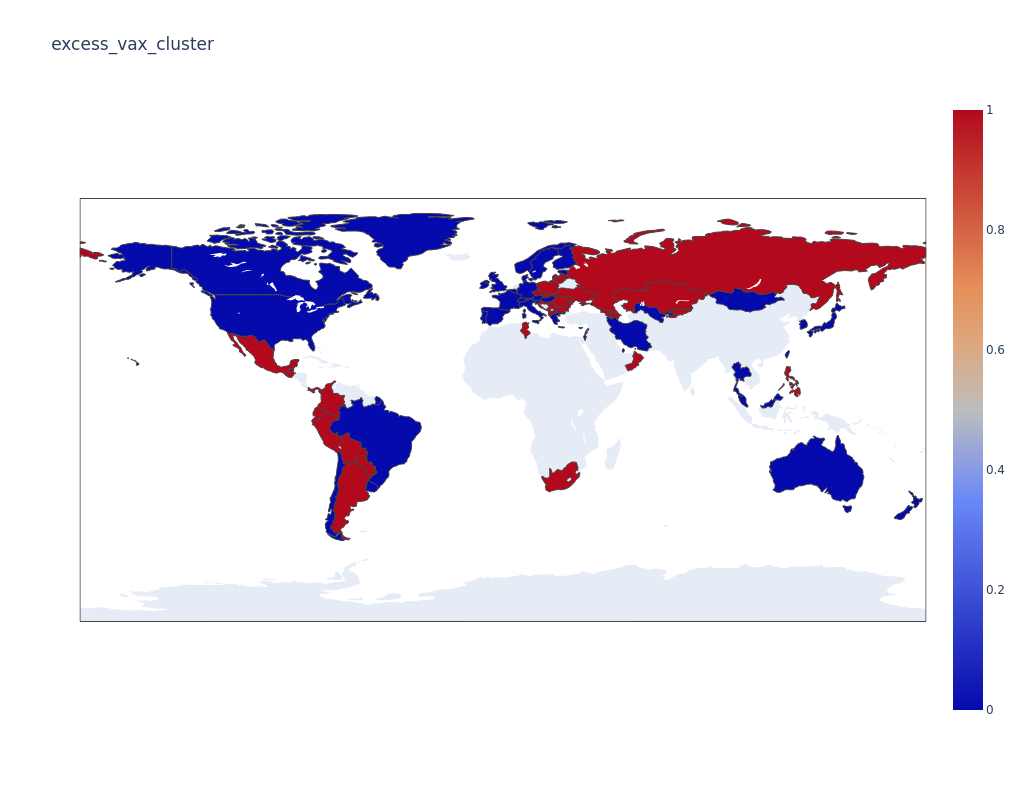

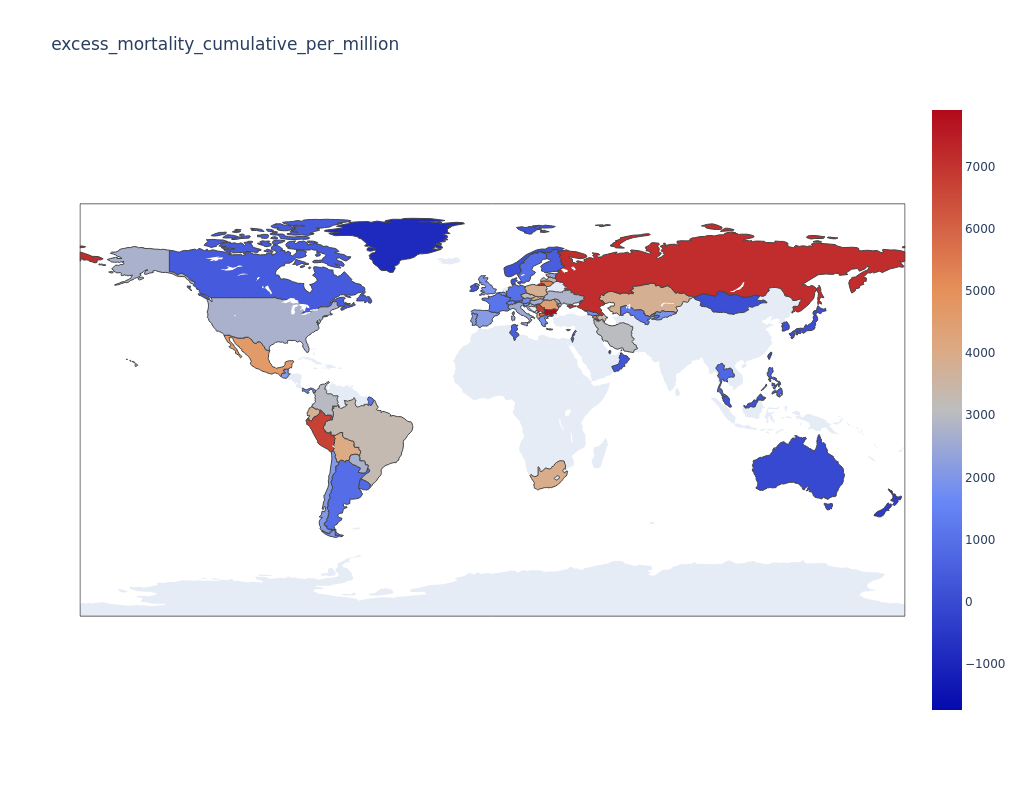

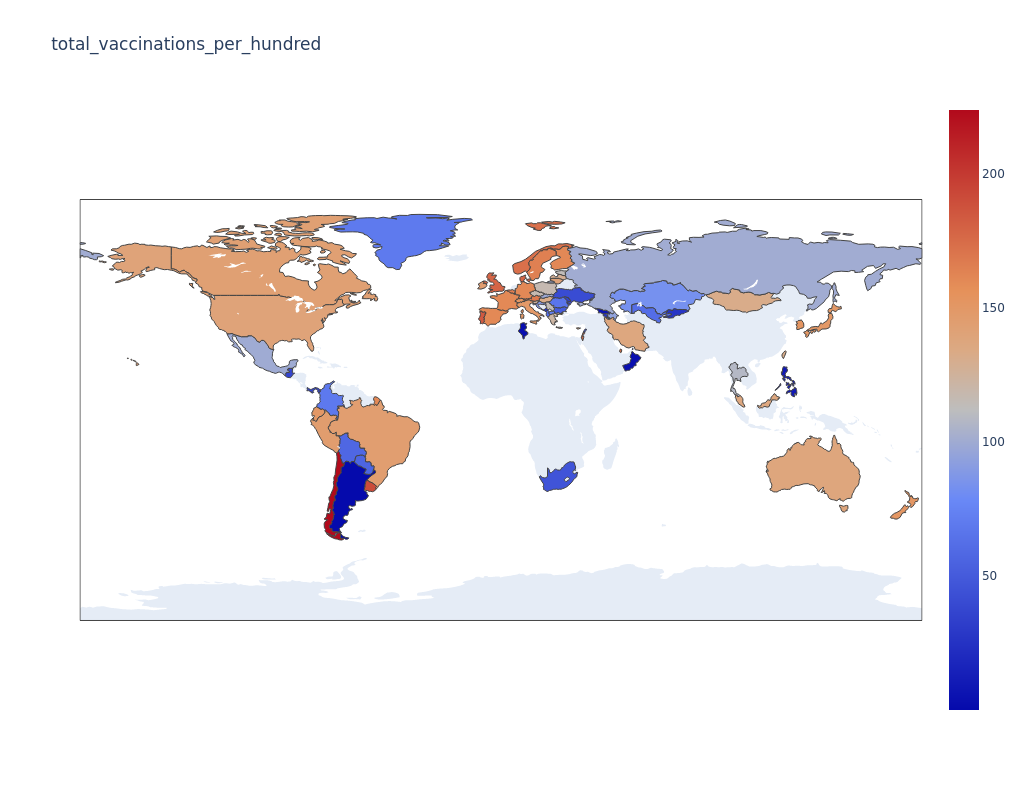

In [56]:
fig = px.scatter(df_latest,    
              x='total_vaccinations_per_hundred',
              y='excess_mortality_cumulative_per_million',
              color='excess_vax_cluster',
              color_discrete_sequence=['blue','red'],
              size='population',
              text='iso_code',
              width=800,
              height=800,
             )
fig.show()

for metric in ['excess_vax_cluster','excess_mortality_cumulative_per_million','total_vaccinations_per_hundred',]:
    fig = go.Figure(data=go.Choropleth(
        locationmode = 'ISO-3',
        locations = df_latest['iso_code'],
        z = df_latest[metric],
        autocolorscale=False,
        #showscale=False
    ))
    fig.update_layout(
        width=1024,
        height=800,
        title_text=metric,
        geo=dict(
            showcoastlines=False,
        ),
        )
    fig.show('png')
 